In [1]:
import os
from shutil import rmtree
from src.test_problem import setup_solver
from src import nk_driver

import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_iage_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
common_args = ["--workdir", wdir, "--tracer_module_names", "iage"]

In [4]:
setup_solver.main(setup_solver.parse_args(common_args + ["--fp_cnt", "1"]))

2020-06-03 20:01:06,872:61148:setup_solver.py:main:args.cfg_fname="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg"
2020-06-03 20:01:06,875:61148:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_iage_wdir/nk_driver.sh
2020-06-03 20:01:06,877:61148:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_iage_wdir/depth_axis_test.nc"
2020-06-03 20:01:06,897:61148:setup_solver.py:main:fp_iter=0
2020-06-03 20:01:11,652:61148:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_iage_wdir/gen_init_iterate/init_iterate.nc"


In [5]:
def plot_all_vars(ds):
    print(ds)
    for varname in ds.data_vars:
        if "bounds" in varname:
            continue
        plot_da = ds[varname].isel(time=slice(1,-1)) if "time" in ds[varname].dims else ds[varname]
        if sum([dimlen>1 for dimlen in plot_da.shape]) > 1:
            cbar_kwargs = {"orientation": "horizontal"}
            plt_ret = plot_da.plot(cbar_kwargs=cbar_kwargs)
        else:
            plt_ret = plot_da.plot()
        plt.title(varname)
        if "fcn_norm" in varname or "increment_norm" in varname:
            plt.yscale("log")
        plt.show()

<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    iage          (depth) float64 ...
Attributes:
    history:  2020-06-03 20:01:06: created by src.test_problem.model_state.Mo...


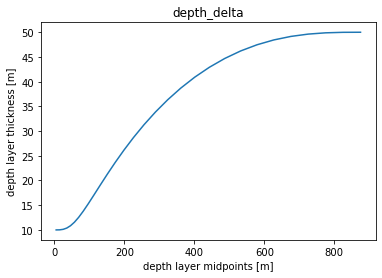

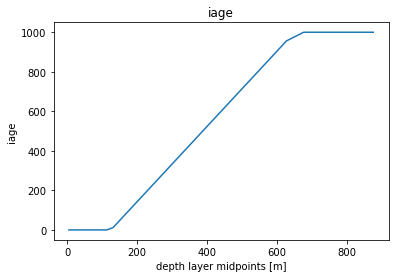

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:          (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time             (time) object 0001-01-01 00:00:00 ... 0002-01-01 00:00:00
  * depth            (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges      (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds     (depth, nbnds) float64 ...
    bldepth          (time) float64 ...
    mixing_coeff     (time, depth_edges) float64 ...
    iage             (time, depth) float64 ...
    iage_time_mean   (depth) float64 ...
    iage_time_anom   (time, depth) float64 ...
    iage_time_delta  (depth) float64 ...
    iage_depth_int   (time) float64 ...
Attributes:
    history:  2020-06-03 20:01:11: created by src.test_problem.model_state._g...


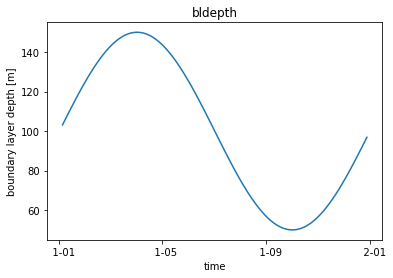

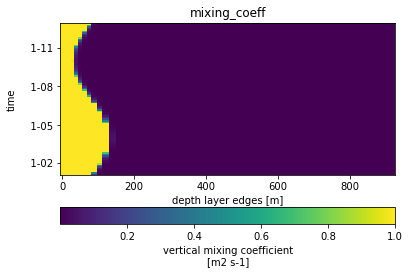

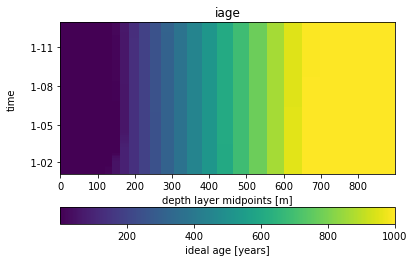

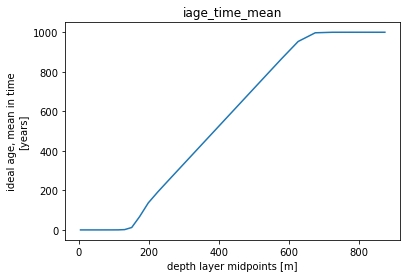

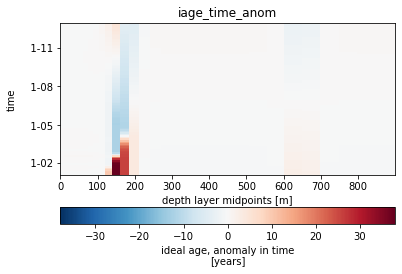

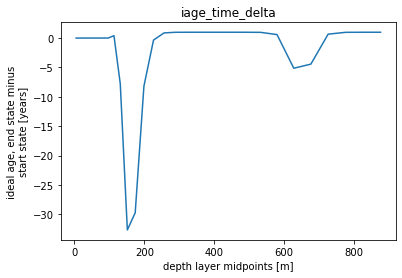

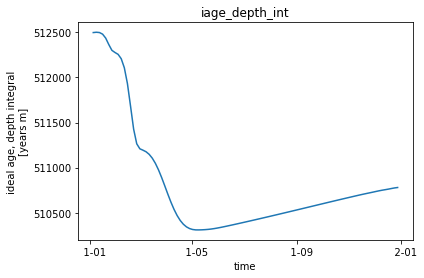

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    iage          (depth) float64 ...
Attributes:
    history:  2020-06-03 20:01:11: created by src.test_problem.model_state.Mo...


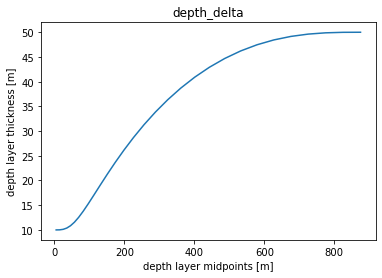

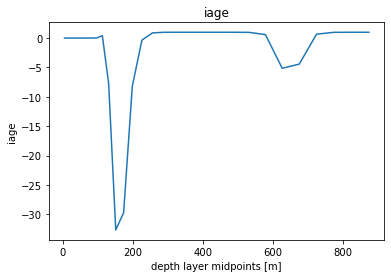

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    iage          (depth) float64 ...
Attributes:
    history:  2020-06-03 20:01:11: created by src.test_problem.model_state.Mo...


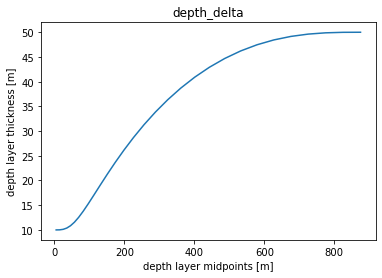

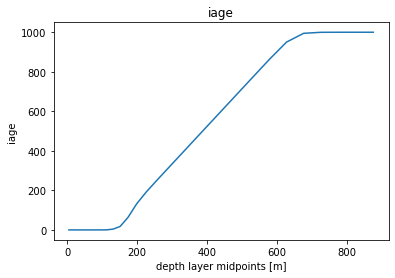

In [9]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [10]:
nk_driver.main(nk_driver.parse_args(common_args + ["--persist"]))

2020-06-03 20:01:14,648:61148:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2020-06-03 20:01:14,662:61148:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2020-06-03 20:01:14,663:61148:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2020-06-03 20:01:14,663:61148:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2020-06-03 20:01:14,667:61148:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_iage_wdir/depth_axis_test.nc for grid_weight
2020-06-03 20:01:14,670:61148:nk_driver.py:main:using class ModelState from src.test_problem.model_state for model state
2020-06-03 20:01:14,672:61148:solver_state.py:__init__:"Newton" iteration now 0
2020-06-03 20:01:18,380:61148:tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[iage]=5.675355e+02
2020-06-03 2

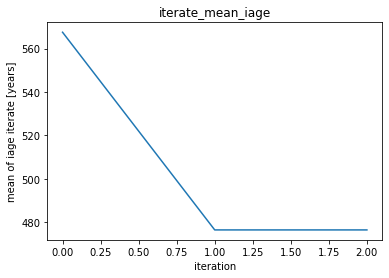

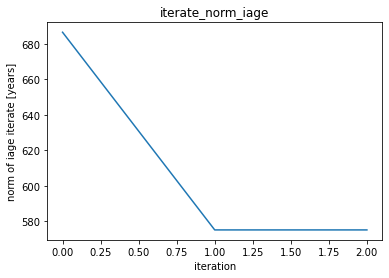

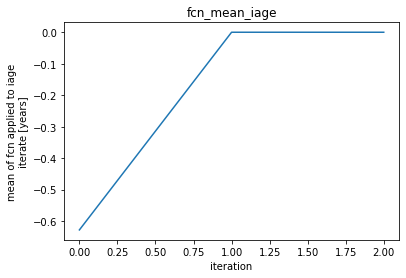

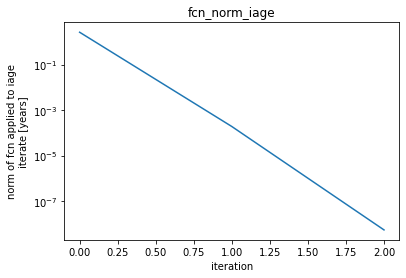

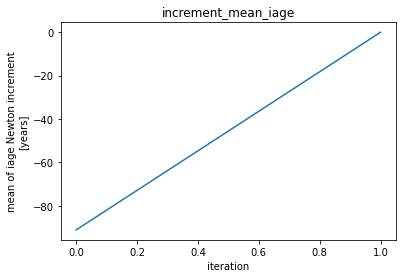

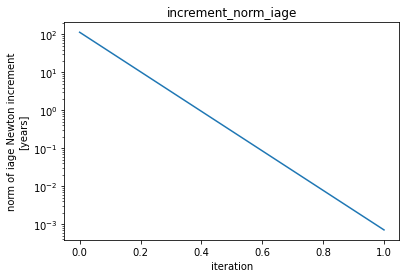

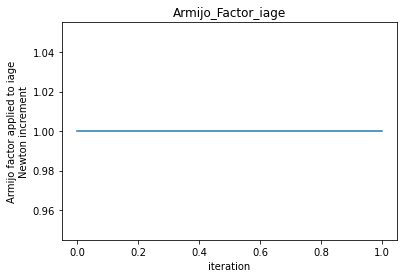

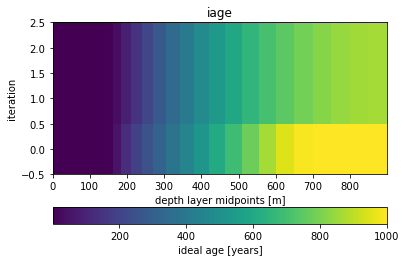

In [11]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [12]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

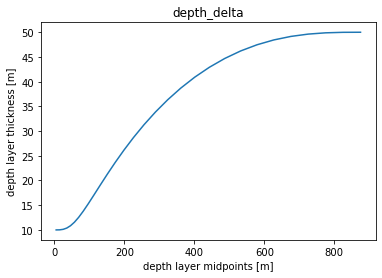

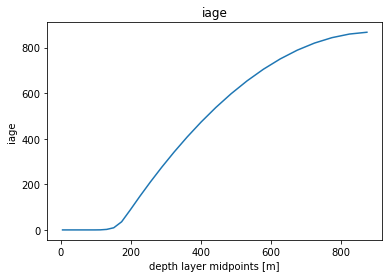

In [13]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

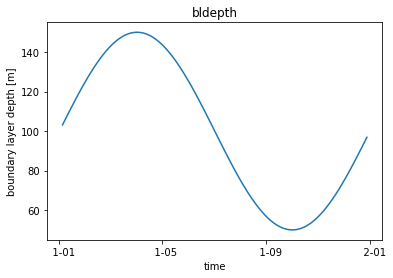

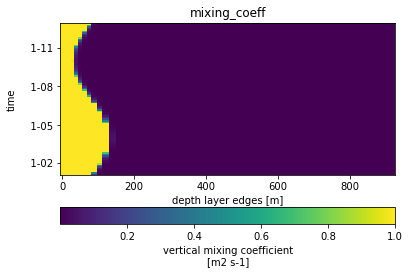

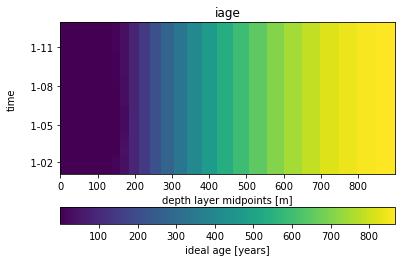

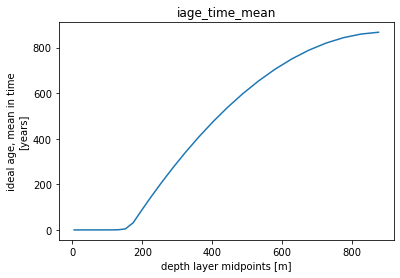

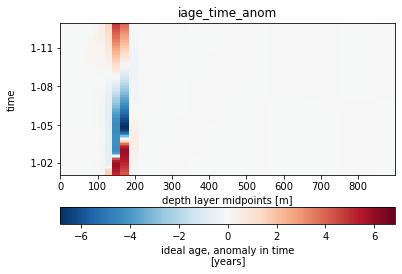

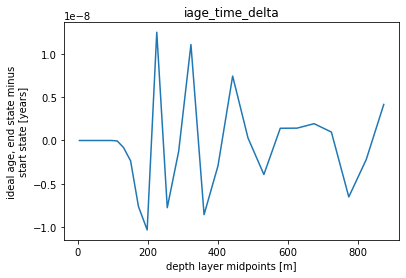

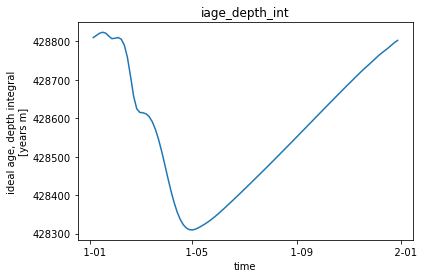

In [14]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

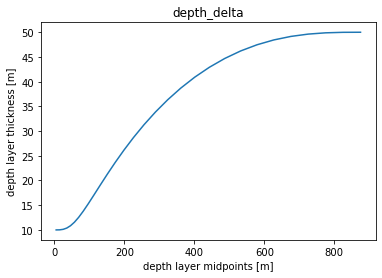

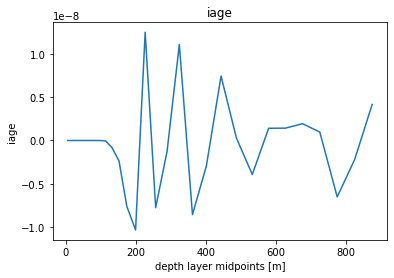

In [15]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)